# Importing dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

In [2]:
pwd

'C:\\Users\\AANCHAL SONI\\diabetes'

# loading dataset

In [3]:
df=pd.read_csv('diabetes.csv')
print('shape',df.shape)
df.head()

shape (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#Calculating the statistical data

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
#Proportion

In [7]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [9]:
#Separating the data labels

In [10]:
X=df.drop(columns='Outcome',axis=1)
Y=df['Outcome']

In [11]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [12]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Text(0.5, 1.0, 'correlation matrix')

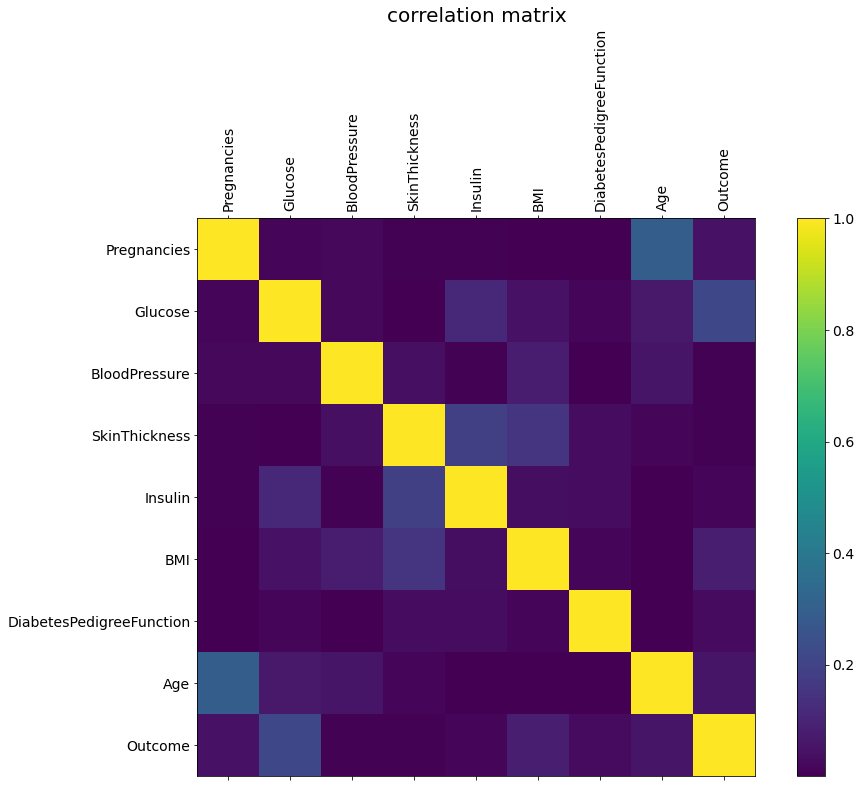

In [15]:
fig = plt.figure(figsize = (15,10))
plt.matshow(df.corr()**2,fignum = fig.number)
plt.xticks(range(df.shape[1]),df.columns,fontsize = 14, rotation = 90)
plt.yticks(range(df.shape[1]),df.columns,fontsize = 14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 14)
plt.title("correlation matrix", fontsize=20)

In [16]:
# 0 is for non-diabetic
# and, 1 is for diabetic

In [17]:
print(df["Outcome"].value_counts())
fig = plt.figure(figsize = (10, 6))

0    500
1    268
Name: Outcome, dtype: int64


<Figure size 720x432 with 0 Axes>

Text(0.5, 1.0, 'Glucose')

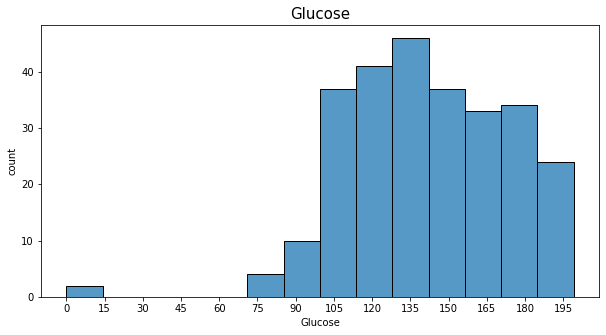

In [18]:
#glucose for diabetic
fig = plt.figure(figsize =(10,5))
sns.histplot(df["Glucose"][df["Outcome"] == 1])
plt.xticks([i for i in range(0,200,15)])
plt.ylabel("count")
plt.title("Glucose",fontsize = 15)

Text(0.5, 1.0, 'Insulin')

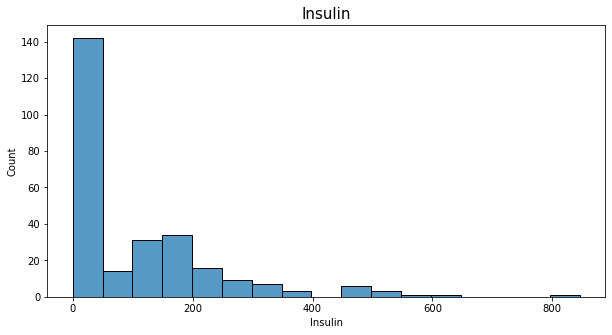

In [19]:
#insulin for diabetic 

fig = plt.figure(figsize = (10,5))

sns.histplot(df["Insulin"][df["Outcome"]==1])
plt.xticks()
plt.title("Insulin",fontsize = 15)

Text(0.5, 1.0, 'BMI')

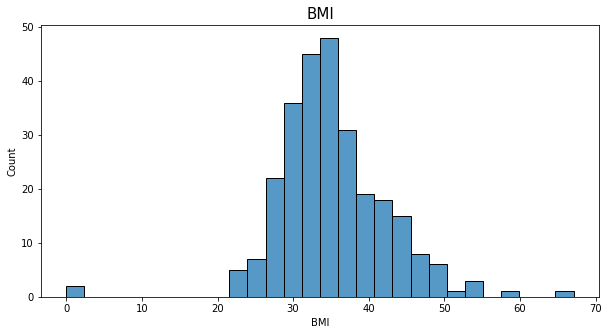

In [20]:
#BMI for diabetic
fig = plt.figure(figsize =(10,5))

sns.histplot(df["BMI"][df["Outcome"]==1])
plt.xticks()
plt.title("BMI",fontsize = 15)

Text(0.5, 1.0, 'diabetespedigreefunction')

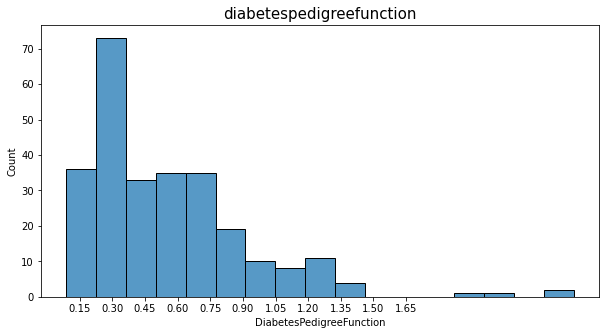

In [21]:
#diabeticpedigreefunction for diabetic
fig = plt.figure(figsize = (10,5))
sns.histplot(df["DiabetesPedigreeFunction"][df["Outcome"] == 1])
plt.xticks([i*0.15 for i in range(1,12)])
plt.title("diabetespedigreefunction",fontsize = 15)

Text(0.5, 1.0, 'Age')

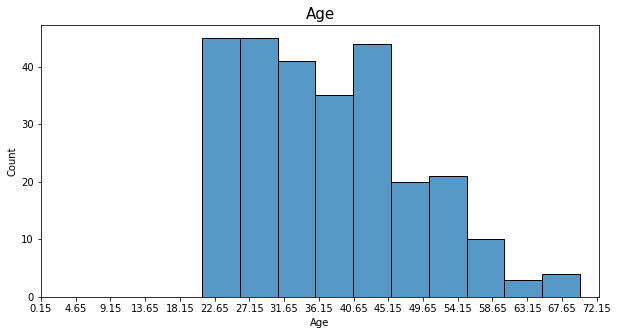

In [22]:
#Age for diabetic
fig = plt.figure(figsize = (10,5))
sns.histplot(df["Age"][df["Outcome"] == 1])
plt.xticks([i*0.15 for i in range(1,500,30)])
plt.title("Age",fontsize = 15)

In [23]:
#Data Standardisation
scaler = StandardScaler()

In [24]:
scaler.fit(X)

StandardScaler()

In [25]:
standardized_data = scaler.transform(X)

In [26]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [27]:
X=standardized_data
Y=df['Outcome']

In [28]:
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [29]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


# Splitting of Data for Training & Test

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.2, stratify=Y, random_state=2)

In [31]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


# 1. Support Vector method

In [32]:
svc_classifier= svm.SVC(kernel='linear')

In [33]:
#Training the support vector machine 

In [34]:
svc_classifier.fit(X_train, Y_train)

SVC(kernel='linear')

In [35]:
#Model EValuation
#Accuracy Score

In [36]:
#accuracy score on the training data
X_train_prediction = svc_classifier.predict(X_train)
svc_training_data_accuracy= accuracy_score(X_train_prediction, Y_train)

In [37]:
print('Accuracy score of training data: ', svc_training_data_accuracy)

Accuracy score of training data:  0.7866449511400652


In [38]:
#accuracy score on the testing data
X_test_prediction = svc_classifier.predict(X_test)
svc_test_data_accuracy= accuracy_score(X_test_prediction, Y_test)

In [39]:
print('Accuracy score of test data:', svc_test_data_accuracy)

Accuracy score of test data: 0.7727272727272727


In [40]:
svc_y_pred = svc_classifier.predict(X_test)
svc_training_data_accuracy= accuracy_score(X_train_prediction, Y_train)

In [41]:
svc_cm = confusion_matrix(Y_test,svc_y_pred)
print(svc_cm)

[[91  9]
 [26 28]]


In [42]:
print("Correct:",sum(svc_y_pred == Y_test))
print("Incorrect : ",sum(svc_y_pred != Y_test))
print("Accuracy:",sum(svc_y_pred ==Y_test)/len(svc_y_pred))

Correct: 119
Incorrect :  35
Accuracy: 0.7727272727272727


# 2. KNN

In [43]:
kn_classifier = KNeighborsClassifier(n_neighbors =5,metric = 'minkowski',p = 2)
kn_classifier.fit(X_train,Y_train)

KNeighborsClassifier()

In [44]:
#Model EValuation
#Accuracy Score

In [45]:
kn_y_pred = kn_classifier.predict(X_test)
kn_training_data_accuracy= accuracy_score(X_train_prediction, Y_train)

In [46]:
print('Accuracy score of training data: ', kn_training_data_accuracy)

Accuracy score of training data:  0.7866449511400652


In [47]:
#accuracy score on the testing data
X_test_prediction = kn_classifier.predict(X_test)
kn_test_data_accuracy= accuracy_score(X_test_prediction, Y_test)

In [48]:
print('Accuracy score of test data:', kn_test_data_accuracy)

Accuracy score of test data: 0.7207792207792207


In [49]:
cm_kn = confusion_matrix(Y_test, kn_y_pred)
print(cm_kn)

[[87 13]
 [30 24]]


In [50]:
print("Correct:",sum(kn_y_pred == Y_test))
print("Incorrect : ",sum(kn_y_pred != Y_test))
print("Accuracy:",sum(kn_y_pred ==Y_test)/len(kn_y_pred))

Correct: 111
Incorrect :  43
Accuracy: 0.7207792207792207


# 3. Naive bias

In [51]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train,Y_train)

GaussianNB()

In [52]:
nb_y_pred =nb_classifier.predict(X_test)

In [53]:
nb_cm = confusion_matrix(nb_y_pred,Y_test)
print(nb_cm)

[[88 23]
 [12 31]]


In [54]:
print("Correct:",sum(nb_y_pred == Y_test))
print("Incorrect : ",sum(nb_y_pred != Y_test))
print("Accuracy:",sum(nb_y_pred ==Y_test)/len(nb_y_pred))

Correct: 119
Incorrect :  35
Accuracy: 0.7727272727272727


# 4. RandomforestClassifier

In [55]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train,Y_train)

RandomForestClassifier()

In [56]:
rf_y_pred =rf_classifier.predict(X_test)

In [57]:
rf_cm = confusion_matrix(rf_y_pred,Y_test)
print(rf_cm)

[[85 25]
 [15 29]]


In [58]:
print("Correct:",sum(rf_y_pred == Y_test))
print("Incorrect : ",sum(rf_y_pred != Y_test))
print("Accuracy:",sum(rf_y_pred ==Y_test)/len(rf_y_pred))

Correct: 114
Incorrect :  40
Accuracy: 0.7402597402597403


# Making a Predictive system

In [60]:
input_data = (1,97,66,15,140,23.2,0.487,22)

#changing the input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the array as we are predicting for one instance
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = nb_classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('The person is non-diabetic')
    
else:
    print('The person is diabetic')

[[-0.84488505 -0.74783062 -0.16054575 -0.3472913   0.52271486 -1.11594738
   0.04567536 -0.95646168]]
[0]
The person is non-diabetic
